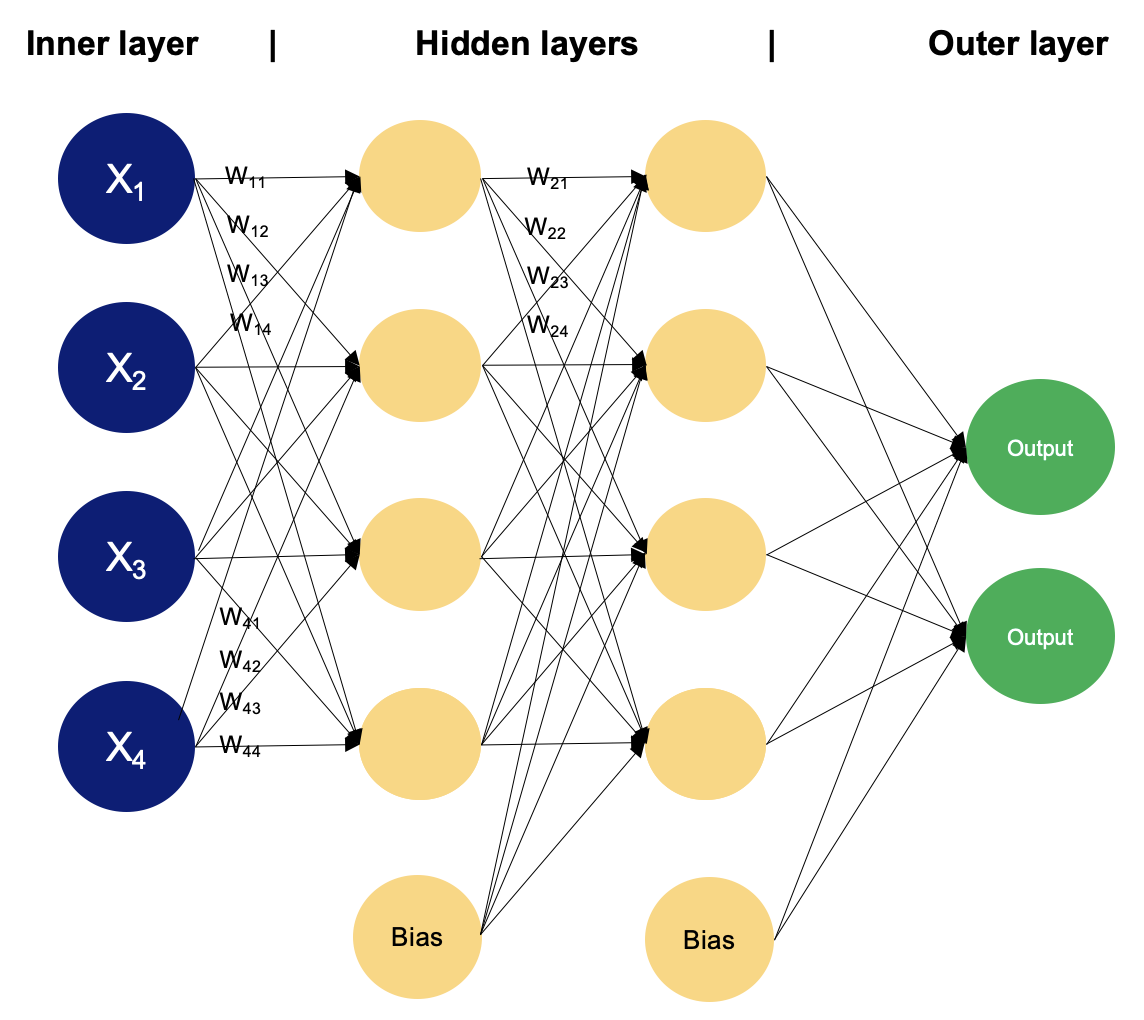 Picture credit: https://www.datacamp.com/tutorial/multilayer-perceptrons-in-machine-learning

# MLP using sklearn

In [8]:
# Import necessary libraries
#References: GeeksforGeeks
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load the Breast Cancer dataset
mnist = load_digits()
X, y = mnist.data, mnist.target


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(64, 32),
                    max_iter=1000, random_state=42)

# Train the model on the training data
mlp.fit(X_train, y_train)
 
# Make predictions on the test data
y_pred = mlp.predict(X_test)
 
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      1.00      0.98        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



# MLP using Keras

In [10]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be in the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Flatten the images (from 28x28 to 784) to be used in the MLP
x_train = x_train.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the MLP model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer with 10 units for 10 classes

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


2024-03-26 09:31:33.237926: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 0.2423 - accuracy: 0.9288 - val_loss: 0.0985 - val_accuracy: 0.9690
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0870 - accuracy: 0.9736 - val_loss: 0.0949 - val_accuracy: 0.9725
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0553 - accuracy: 0.9824 - val_loss: 0.0729 - val_accuracy: 0.9798
Epoch 4/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0371 - accuracy: 0.9886 - val_loss: 0.0638 - val_accuracy: 0.9812
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0283 - accuracy: 0.9907 - val_loss: 0.0818 - val_accuracy: 0.9777
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0221 - accuracy: 0.9928 - val_loss: 0.0707 - val_accuracy: 0.9812
Epoch 7/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0765 - val_accuracy: 0.9822
Epoch 

# MLP using pytorch

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define a simple MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Hyperparameters
input_size = 28 * 28  # MNIST image size (28x28)
hidden_size = 512
num_classes = 10
learning_rate = 0.001
batch_size = 128
num_epochs = 10

# Load MNIST dataset and apply transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
model = MLP(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the {total} test images: {(correct / total) * 100:.2f}%')


100%|██████████| 9912422/9912422 [00:02<00:00, 3750519.04it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 2908769.21it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 4002428.00it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2484743.55it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch [1/10], Step [100/469], Loss: 0.2828
Epoch [1/10], Step [200/469], Loss: 0.3005
Epoch [1/10], Step [300/469], Loss: 0.3233
Epoch [1/10], Step [400/469], Loss: 0.2806
Epoch [2/10], Step [100/469], Loss: 0.1753
Epoch [2/10], Step [200/469], Loss: 0.1108
Epoch [2/10], Step [300/469], Loss: 0.1952
Epoch [2/10], Step [400/469], Loss: 0.1428
Epoch [3/10], Step [100/469], Loss: 0.0499
Epoch [3/10], Step [200/469], Loss: 0.1181
Epoch [3/10], Step [300/469], Loss: 0.1215
Epoch [3/10], Step [400/469], Loss: 0.0935
Epoch [4/10], Step [100/469], Loss: 0.1083
Epoch [4/10], Step [200/469], Loss: 0.1074
Epoch [4/10], Step [300/469], Loss: 0.0348
Epoch [4/10], Step [400/469], Loss: 0.0268
Epoch [5/10], Step [100/469], Loss: 0.0748
Epoch [5/10], Step [200/469], Loss: 0.1165
Epoch [5/10], Step [300/469], Loss: 0.0877
Epoch [5/10], Step [400/469], Loss: 0.1503
Epoch [6/10], Step [100/469], Loss: 0.1334
Epoch [6/10], Step [200/469], Loss: 0.1159
Epoch [6/10], Step [300/469], Loss: 0.0767
Epoch [6/10